In [15]:
#Definimos un campo vectorial 
def vectorfield(w, t, p):
    """
    Define las ecuaciones diferenciales para un sistema masa-resorte acoplado.

    Argumentos:
        w :  vector de las variables establecidas:
                  w = [x1,y1,x2,y2]
        t :  tiempo
        p :  vector de los parámetros:
                  p = [m,k,L1,L2]
    """
    x1, y1, x2, y2 = w
    m, k , L1, L2 = p

    # Creamos f = (x1',y1',x2',y2'):
    f = [y1,
          k * ( -2*x1 + L1 - L2 + x2 ) / m,
         y2,
         - k * ( x2 - x1 - L2 )/ m]
    
    return f

In [16]:

# Utilizamos ODEINT para resolver las ecuaciones diferenciales definidas por el campo vectorial.
from scipy.integrate import odeint

# Valores de los parámetros
# Masas:
m = 1.0

# Constantes de los resortes
k = 1.0

# Longitudes naturales
L1 = 1.0
L2 = 1.0

# Condiciones iniciales
# x1 y x2 son los desplazamientos iniciales
# y1 y y2 son las velocidades iniciales
x1 = 1.0
y1 = 0.0
x2 = 0.0
y2 = 0.0

#Pámetros de reslución del EDO 
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 30.0
numpoints = 750



In [17]:
# Creamos las muestras de tiempo para el resultado del solucionador de EDO  
# Usamos un gran número de puntos, para hacer una gráfica de la solución con 
# buen aspecto.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]


# Empacamos los parámetros y las condiciones iniciales:
p = [m, k, L1, L2]
w0 = [x1, y1, x2, y2]

# Llamamos al solucionador de EDO.
wsol = odeint(vectorfield, w0, t, args=(p,),
              atol=abserr, rtol=relerr)


#for t1, w1 in zip(t, wsol):
#    print(t1, w1[0], w1[1], w1[2], w1[3], file=open("two_springs.dat", "a"))

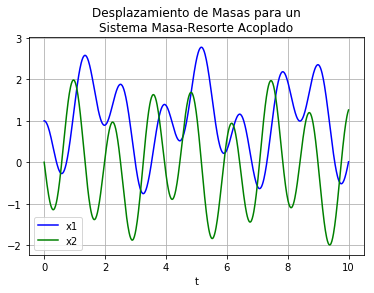

In [28]:
t = np.linspace(0, 10, 750)
plt.plot(t, wsol[:, 0], 'b', label='x1')
plt.plot(t, wsol[:, 1], 'g', label='x2')
plt.legend(loc='best')
plt.xlabel('t')
plt.title('Desplazamiento de Masas para un\nSistema Masa-Resorte Acoplado')
plt.grid()
plt.savefig('dos_resortes.png', dpi=100)
plt.show()